## Ejercicio Semanal - Tipos de Clientes

Te encargarás de categorizar a algunos de tus clientes en base a datos históricos. No hay noción de qué tipo de clientes hay. ¡Se le pide que lo averigüe!

* cargar datos / customers.csv
* recuerde que la transformación y la normalización pueden ayudar.
* ¿Hay valores atípicos?
* considere usar PCA para reducir las dimensiones
* Utilice k-means para crear los grupos que le resulten más útiles.
* Utilice visualizaciones para describir sus grupos.

Cuales grupos hizo y porque? Esto lo discutimos en clase!

### Atributos:

- FRESH: gasto anual (m.u.) en productos frescos (Continuo);
- LECHE: gasto anual (m.u.) en productos lácteos (Continuo);
- ALIMENTOS: gasto anual (m.u.) en productos alimenticios (Continuo);
- CONGELADOS: gasto anual (m.u.) en productos congelados (Continuo)
- DETERGENTS_PAPER: gasto anual (m.u.) en detergentes y productos de papel (Continuo)
- DELICATESSEN: gasto anual (m.u.) en productos delicatessen (Continuo);
- CANAL: Canal de clientes - Horeca (Hotel / Restaurante / Cafetería) o Canal Minorista (Nominal)
- REGIÓN: clientes Región Lisnon, Oporto u Otro (Nominal)

In [1]:
import pandas as pd

data = pd.read_csv("../data/customers.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
# obtenemos la informacion de ventas
X = data.iloc[:,2:]

In [3]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X2d = pca.transform(X)

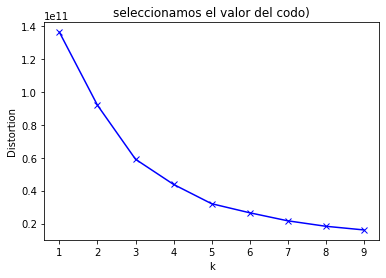

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X2d)
    distortions.append(model.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('seleccionamos el valor del codo)')
plt.show()

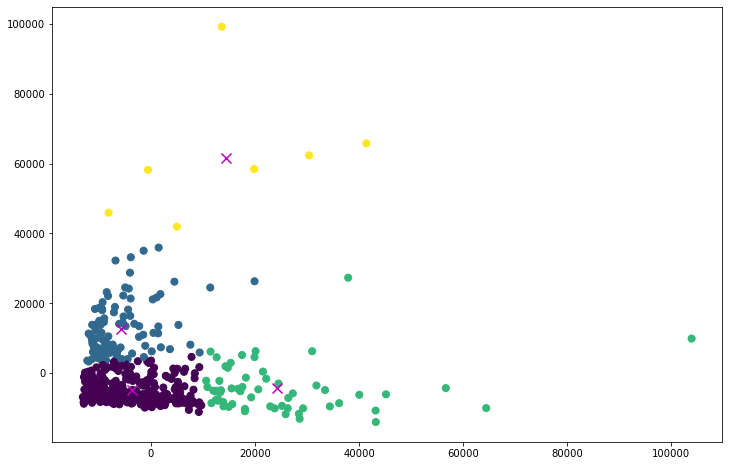

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2d)
predict = kmeans.predict(X2d)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
plt.scatter(X2d[ : , 0], X2d[ :, 1], s = 50, c = predict)

for c in centroids:
    plt.scatter(c[0], c[1], marker = "x", s = 100, c = "m")

In [10]:
data['y'] = pd.Series(predict)

df = data.iloc[:,2:]
df.head()

# separacion en grupos
g0 = df[df.y == 0]
g1 = df[df.y == 1]
g2 = df[df.y == 2]
g3 = df[df.y == 3]

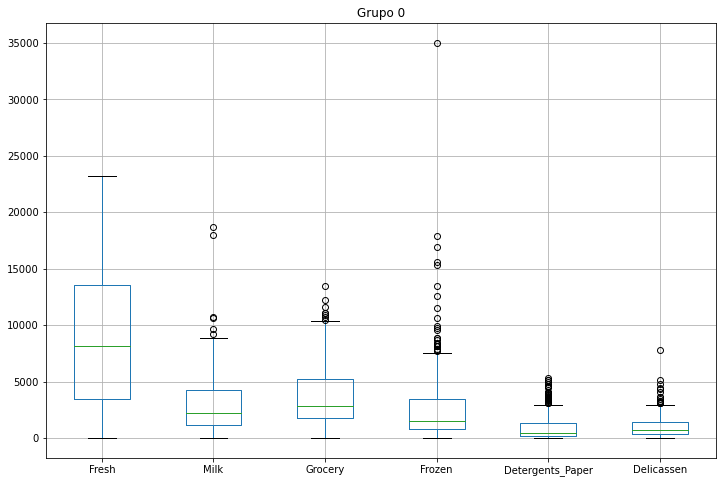

In [13]:
plt.figure(figsize=(12,8))
plt.title("Grupo 0")
boxplot = g0.boxplot(column=['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen'])

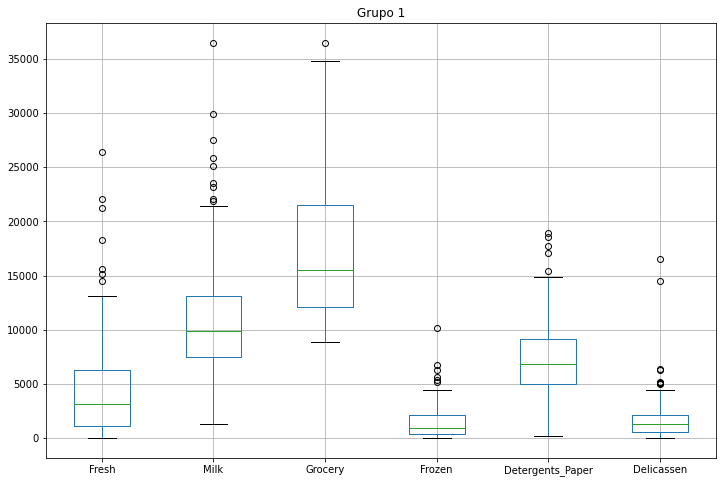

In [14]:
plt.figure(figsize=(12,8))
plt.title("Grupo 1")
boxplot = g1.boxplot(column=['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen'])

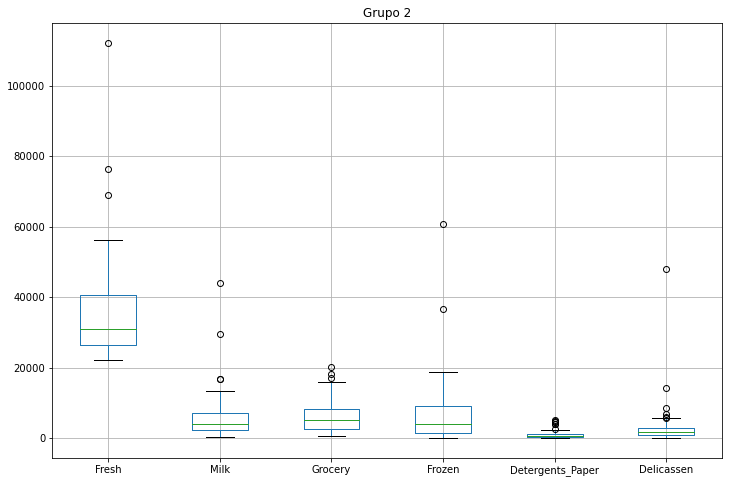

In [15]:
plt.figure(figsize=(12,8))
plt.title("Grupo 2")
boxplot = g2.boxplot(column=['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen'])

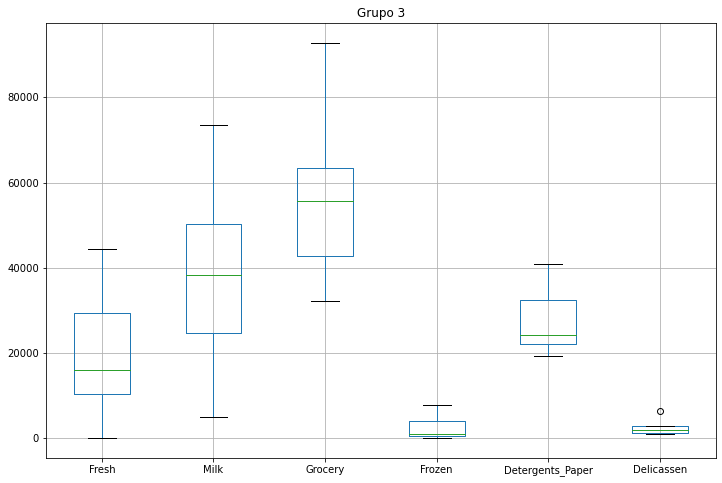

In [16]:
plt.figure(figsize=(12,8))
plt.title("Grupo 3")
boxplot = g3.boxplot(column=['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen'])